## Final Project:
## Data Analytics to Evaluate the Impact of Covid-19 Pandemic on WIC in California

<img src="https://unitedhealthcenters.org/sites/default/files/styles/large/public/inline-images/cVe8Npo5BrTZEoNBnysJ1WrcOuSWEDKt3hlqzpTmNRlnQOeciY.png?itok=lLljmc90">


### Part 1: Introduction

Hello, I am Yijin Zhu. 

This project aims to analyze the impact of Covid-19 pandemic on the California Women, Infants and Children(WIC) program by examining redemption datasets provided by CA government.

To achieve this goal, multiple data analysis techniques will be utilized to gather, process, and represent data from the datasets. The analysis will focus on answering the following questions:

- How has WIC redemption in California changed over the past decade?
- Did the outbreak of Covid-19 affect WIC redemption statewide?
- If so, can we find any similar trends in the data from big counties in CA?

The datasets using in this project are from California Open Data Portal (https://data.ca.gov/). 
The main datasets come from the topic: 'California Women, Infants and Children Program Redemption by County'. It provides "the number of participants or families who redeemed their benefits and the subsequent dollar value of those redeemed benefits by the vendor county starting the calendar years of 2010 and forward".
There are two more supporting datasets, one is to denote coordinates of all counties in CA, another dataset has locations of all vendors of WIC in CA.

### Part 2: Background

The Women, Infants and Children (WIC) Program is a federally-funded health and nutrition program that provides assistance to pregnant women, new mothers, infants and children under age five. WIC helps California families by providing food benefits to individual participants, which can be applied to purchase healthy supplemental foods from about 4,000 WIC authorized vendor stores throughout the State. 
WIC also provides nutritional education, breastfeeding support, healthcare referrals and other community services. Participants must meet income guidelines and other criteria. Currently, 84 WIC agencies provide services monthly to approximately one million participants at over 500 sites in local communities throughout the State.
[official website](https://www.cdph.ca.gov/Programs/CFH/DWICSN/Pages/Program-Landing1.aspx)

Links of input datasets being used in the project:
- https://data.ca.gov/dataset/california-women-infants-and-children-program-redemption-by-county
- https://data.ca.gov/dataset/women-infants-and-children-wic-authorized-vendors
- https://data.ca.gov/dataset/california-counties

Some background information refered by this project:
- UN WOMEN. (2020, September 16). COVID-19 and its economic toll on women: The story behind the numbers. UN Women. https://www.unwomen.org/en/news/stories/2020/9/feature-covid-19-economic-impacts-on-women

- ECONOMIC IMPACT OF COVID-19 ON SINGLE MOTHERS. (n.d.). Women’s Council Wisconsin. Retrieved April 19, 2023, from https://womenscouncil.wi.gov/Documents/SingleMothersCOVIDInfoSheet_F_Corr.pdf
- McHenry, P. (2011). The Relationship between Location Choice and Earnings Inequality. RePEc: Research Papers in Economics. http://economics.wm.edu/wp/cwm_wp112.pdf


### Part 3: Data preprocessing

#### 1. Read each csv files into Dataframes
- There are three csv files featuring the same categories of data in different time intervals: 
Year 2010-2018; Year 2019-2020; Year 2021.

#### 2. Slice each dataframe into two parts: statewide data and county-based data
- Use the values in "Vendor County" column to filter the data frame.


In [2]:
pip install pyspark==3.2.1

     |████████████████████████████████| 281.4 MB 31 kB/s s eta 0:00:01    |████▎                           | 37.2 MB 23.1 MB/s eta 0:00:11     |█████▉                          | 51.4 MB 14.8 MB/s eta 0:00:16     |████████                        | 70.2 MB 6.3 MB/s eta 0:00:34     |██████████▎                     | 90.0 MB 16.3 MB/s eta 0:00:12     |██████████▍                     | 91.2 MB 16.3 MB/s eta 0:00:12     |██████████▌                     | 92.0 MB 16.3 MB/s eta 0:00:12     |█████████████▉                  | 121.3 MB 28.8 MB/s eta 0:00:06 |██████████████                  | 123.7 MB 28.8 MB/s eta 0:00:06     |██████████████▏                 | 124.8 MB 7.4 MB/s eta 0:00:22.0 MB 7.4 MB/s eta 0:00:20     |███████████████▌                | 136.5 MB 7.4 MB/s eta 0:00:2005     |████████████████████▎           | 177.9 MB 25.4 MB/s eta 0:00:05     |██████████████████████████▏     | 230.6 MB 22.6 MB/s eta 0:00:03
     |████████████████████████████████| 198 kB 19.5 MB/s eta 0:00:01
  Crea

In [2]:
from pyspark.sql import SparkSession

In [17]:
# for data cleaning and visualization
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [15]:
# create a SparkSession
spark = SparkSession.builder.appName('WIC-Redemption-Analysis').getOrCreate()

# load the CSV file as a Spark DataFrame
# year 2010 - 2018
data1 = spark.read.csv('2010-2018-part-a-wic-redemptions-by-vendor-county-with-family-counts.csv', header=True, inferSchema=True)


# show the first 5 rows of the DataFrame
data1.show(5)


+------------------+-------------+-------------------------+---------------------------+-----------------------------------+---------------------------------+-----------------------+-------------------------------+-------------------+---------------------+
|Vendor County Code|Vendor County|Obligation Year and Month|Number of Families Redeemed|Number of Food Instruments Redeemed|Dollar Amount of Food Instruments|Average Cost per Family|Statewide Infant Formula Rebate|Total Cost Adjusted|Average Cost Adjusted|
+------------------+-------------+-------------------------+---------------------------+-----------------------------------+---------------------------------+-----------------------+-------------------------------+-------------------+---------------------+
|                 0|    Statewide|                     2010|                    1289876|                           59329338|               $1,054,621,338.02 |               $817.61 |               $221,543,339.00 |   $833,077,999

In [8]:
# slice the dataframe by state data and county data
state1 = data1.filter(data1['Vendor County'] == 'Statewide')
county1 = data1.filter(data1['Vendor County'] != 'Statewide')



In [6]:
# repeat the process for the other two files
# year 2019 - 2020

data2 = spark.read.csv('2019-2020-part-b-wic-redemptions-by-vendor-county-with-family-counts.csv', header=True, inferSchema=True)
state2 = data2.filter(data2['Vendor County'] == 'Statewide')
county2 = data2.filter(data2['Vendor County'] != 'Statewide')

# year 2021
data3 = spark.read.csv('2021-forward-part-c-wic-ebt-redemptions-by-vendor-county-with-family-counts.csv', header=True, inferSchema=True)
state3 = data3.filter(data3['Vendor County'] == 'Statewide')
county3 = data3.filter(data3['Vendor County'] != 'Statewide')

#### 3. Select informative columns from datasets

Goal: 
- We need to group state-level data together into a new dataframe, the purpose is for a general view.
- Concat county-level data into a new dataframe as well, for a more detailed evaluation if needed. 

Problems:
- As shown above, not all datasets has the same number of columns. 
- Some columns have data that either can be derived from other columns, or not informative at all. 

Let us first take a look at state dataset 1, for example:

In [13]:
state1.show(5)

+-------------------------+---------------------------+-----------------------+-------------------------------+
|Obligation Year and Month|Number of Families Redeemed|Average Cost per Family|Statewide Infant Formula Rebate|
+-------------------------+---------------------------+-----------------------+-------------------------------+
|                     2010|                    1289876|               $817.61 |               $221,543,339.00 |
|                   201001|                     921221|                $95.44 |                $18,478,922.00 |
|                   201002|                     906879|                $95.04 |                $17,058,350.00 |
|                   201003|                     931018|                $94.50 |                $19,091,175.00 |
|                   201004|                     935205|                $94.60 |                $19,284,028.00 |
+-------------------------+---------------------------+-----------------------+-------------------------

After observing the columns of the CA state datasets, we find that following data hidden information:

- Vendor County Code (0) and Vendor County (Statewide) have the same value for all rows;
- Number of Food Instruments Redeemed is not a good indication of actural redemption cost;
- Dollar Amount of Food Instruments = Number of Families Redeemed * Average Cost per Family. Also this column is not avaliable in all datasets.
- Total Cost Adjusted and Average Cost Adjusted are directly related to Dollar Amount of Food Instruments and Average Cost per Family. Also in county-level data, all the costs are original, not adjusted.
- Statewide Infant Formula Rebate only avaliable at state-level, but we can still check the changes over time in this feature.

According to the findings above, we can reconstruct the state data with only four columns: 'Obligation Year and Month', 'Number of Families Redeemed', 'Average Cost per Family', 'Statewide Infant Formula Rebate'.

In [12]:
state1 = state1[['Obligation Year and Month', 'Number of Families Redeemed', 'Average Cost per Family', 'Statewide Infant Formula Rebate']] 
state2 = state2[['Obligation Year and Month', 'Number of Families Redeemed', 'Average Cost per Family', 'Statewide Infant Formula Rebate']] 
state3 = state3[['Obligation Year and Month', 'Number of Families Redeemed', 'Average Cost per Family', 'Statewide Infant Formula Rebate']] 
state = state1.union(state2).union(state3)

state.printSchema()
state.show(5)
df.write.csv("state_data.csv", header=True)

+-------------------------+---------------------------+-----------------------+-------------------------------+
|Obligation Year and Month|Number of Families Redeemed|Average Cost per Family|Statewide Infant Formula Rebate|
+-------------------------+---------------------------+-----------------------+-------------------------------+
|                     2010|                    1289876|               $817.61 |               $221,543,339.00 |
|                   201001|                     921221|                $95.44 |                $18,478,922.00 |
|                   201002|                     906879|                $95.04 |                $17,058,350.00 |
|                   201003|                     931018|                $94.50 |                $19,091,175.00 |
|                   201004|                     935205|                $94.60 |                $19,284,028.00 |
+-------------------------+---------------------------+-----------------------+-------------------------

Then, we construct county dataframe using the similar method with the four columns: 'Vendor County', 'Obligation Year and Month', 'Number of Families Redeemed', 'Average Cost per Family'.

In [14]:
county1 = county1[['Vendor County', 'Obligation Year and Month', 'Number of Families Redeemed', 'Average Cost per Family']]
county2 = county2[['Vendor County', 'Obligation Year and Month', 'Number of Families Redeemed', 'Average Cost per Family']]
county3 = county3[['Vendor County', 'Obligation Year and Month', 'Number of Families Redeemed', 'Average Cost per Family']]
county = county1.union(county2).union(county3)

county.printSchema()
county.show(5)
df.write.csv("county_data.csv", header=True)

+-------------+-------------------------+---------------------------+-----------------------+
|Vendor County|Obligation Year and Month|Number of Families Redeemed|Average Cost per Family|
+-------------+-------------------------+---------------------------+-----------------------+
|      Alameda|                     2010|                      41271|               $662.31 |
|      Alameda|                   201001|                      25464|                $88.92 |
|      Alameda|                   201002|                      25539|                $87.97 |
|      Alameda|                   201003|                      25940|                $87.23 |
|      Alameda|                   201004|                      25978|                $87.39 |
+-------------+-------------------------+---------------------------+-----------------------+
only showing top 5 rows



#### 4. Change data types
As the info of state data shown below, our dataframes still need some preparation, because:
- Some columns have the data type as object, which need to be changed into numerical data types for evaluation and plotting.
- We also need to remove dollar signs and commas in certain columns, before type casting.
- All the Nans in the datasets are shown in hyphen '-', need to be replaced by real Nans.

In [16]:
state.printSchema()

root
 |-- Obligation Year and Month: integer (nullable = true)
 |-- Number of Families Redeemed: string (nullable = true)
 |-- Average Cost per Family: string (nullable = true)
 |-- Statewide Infant Formula Rebate: string (nullable = true)



In [19]:
state.info()

AttributeError: 'DataFrame' object has no attribute 'info'

Preparing the state data:
- Cast object into string;
- Replace punctuations with empty string;
- Cast string into float.

In [7]:
state.iloc[:, -3:] = state.iloc[:, -3:].astype('string').replace({'\$':'', ',':''}, regex=True).astype(np.float64)
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Obligation Year and Month        156 non-null    int64  
 1   Number of Families Redeemed      156 non-null    float64
 2   Average Cost per Family          156 non-null    float64
 3   Statewide Infant Formula Rebate  156 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 5.0 KB


Prepare the conuty data:
- Change all hyphens into np.nan;
- Drop all rows with Nans;
- Same cast, replace and cast.

In [8]:
county = county.replace('-', np.nan,regex = True)
county = county.dropna()
county.iloc[:, -2:] = county.iloc[:, -2:].astype('string').replace({'\$':'', ',':''}, regex=True).astype(np.float64)
county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8321 entries, 0 to 8890
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Vendor County                8321 non-null   object 
 1   Obligation Year and Month    8321 non-null   int64  
 2   Number of Families Redeemed  8321 non-null   float64
 3   Average Cost per Family      8321 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 325.0+ KB


Final datasets for data analysis:

In [9]:
print('State Dataframe size: ', state.shape)
state.head()

State Dataframe size:  (156, 4)


,Obligation Year and Month,Number of Families Redeemed,Average Cost per Family,Statewide Infant Formula Rebate
0,2010,1289876.0,817.61,221543339.0
1,201001,921221.0,95.44,18478922.0
2,201002,906879.0,95.04,17058350.0
3,201003,931018.0,94.50,19091175.0
4,201004,935205.0,94.60,19284028.0


In [10]:
print('County-level Dataframe size: ', county.shape)
county.head()

County-level Dataframe size:  (8321, 4)


,Vendor County,Obligation Year and Month,Number of Families Redeemed,Average Cost per Family
0,Alameda,2010,41271.0,662.31
1,Alameda,201001,25464.0,88.92
2,Alameda,201002,25539.0,87.97
3,Alameda,201003,25940.0,87.23
4,Alameda,201004,25978.0,87.39


### Part 4: Data Analysis
#### 1. State-level Analysis
1a. General redemption trends from 2010-2021
- First of all, out state dataframe contains both yearly and monthly data. Let us filter out the yearly data to build a general picture;
- Since both number of families and average cost is changing, we can add another column showing the total redemption. This column is included in some datasets but not all, so it is easier to calculate whenever needed with now curated data. 
- Plotting each feature in a subplot.

In [11]:
state_year = state.iloc[::13, :].set_index('Obligation Year and Month')
state_year['Total Cost'] = state_year.apply(lambda row: row['Number of Families Redeemed'] * row['Average Cost per Family'], axis=1)

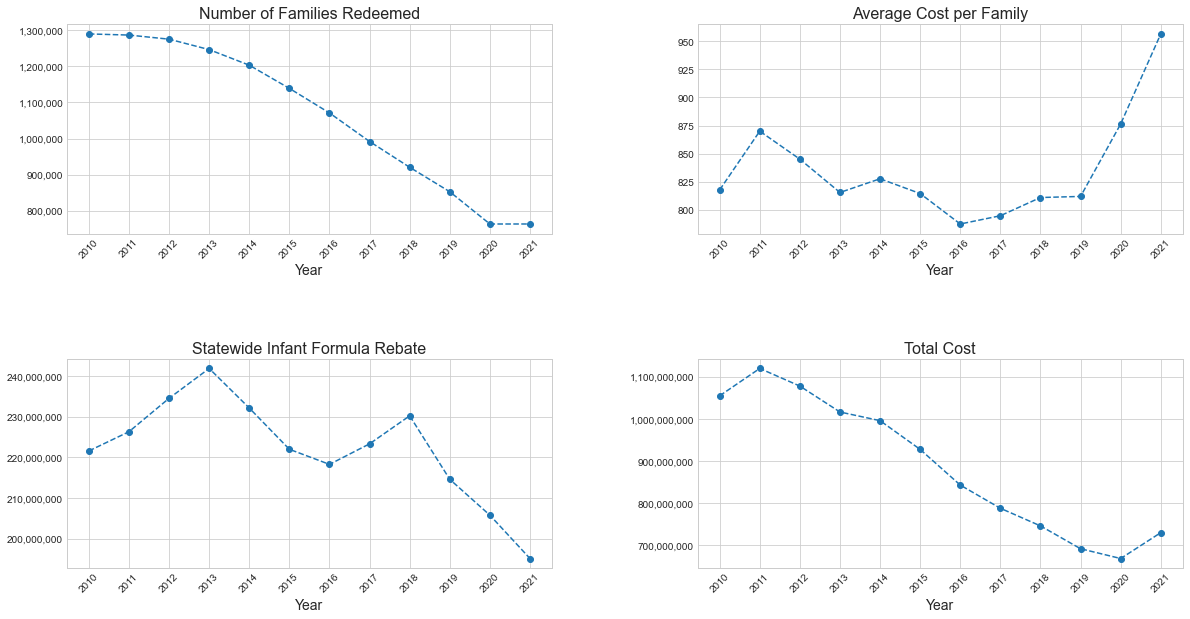

In [12]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10))
for i in range(1, 5):
    plt.subplot(2,2,i)
    plt.subplots_adjust(hspace=0.6,wspace=0.3)
    plt.title(state_year.columns[i-1],fontsize=16)
    plt.xlabel("Year",fontsize=14)
    plt.plot(np.arange(12),state_year[state_year.columns[i-1]], 'o--')
    # set xtick to each year
    plt.xticks(np.arange(12),state_year.index.tolist(),rotation=45)
    # formatting the y-axis to reader-friendly numbers
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))




From the plots above, we can see several patterns:
- Number of Families Redeemed has been dropping faster and faster from year 2010-2020; however, the decreasing suddenly stopped, even increased a little in year 2021.
- Average Cost per Family has been changing slightly (<50) from 2010 to 2019. But from both year 2020 and 2021, the average cost is increasing with a speed over 50 a year. 2021 has the biggest acceleration so far, for a speed over 75.
- Statewide Infant Formula Rebate has been dropping since 2019. There is no sign of significant changes rencently.
- Total Cost is also worth checking because it has been decreasing for 9 consecutive years since 2011. But after 2020, it increased by over 50 million.

1b. Detailed redemption pattern from 2019-2021

Since CA statewide lockdown happened at the beginning of 2020, we can examine three years, 2019, 2020, 2021 more closely with monthly data. Our strategies are as follows:
- Sort out the data;
- Calculate and add total cost column;
- Convert year and month data from integer to datetime, then set it as index, for plotting x-ticks in the form of months;
- Plot and analyze

In [13]:
state_covid = state[state['Obligation Year and Month']>201900].copy()
state_covid['Total Cost'] = state_covid.apply(lambda row: row['Number of Families Redeemed'] * row['Average Cost per Family'], axis=1)
state_covid['Obligation Year and Month'] = pd.to_datetime(state_covid['Obligation Year and Month'], format = '%Y%m')
state_covid = state_covid.set_index('Obligation Year and Month')

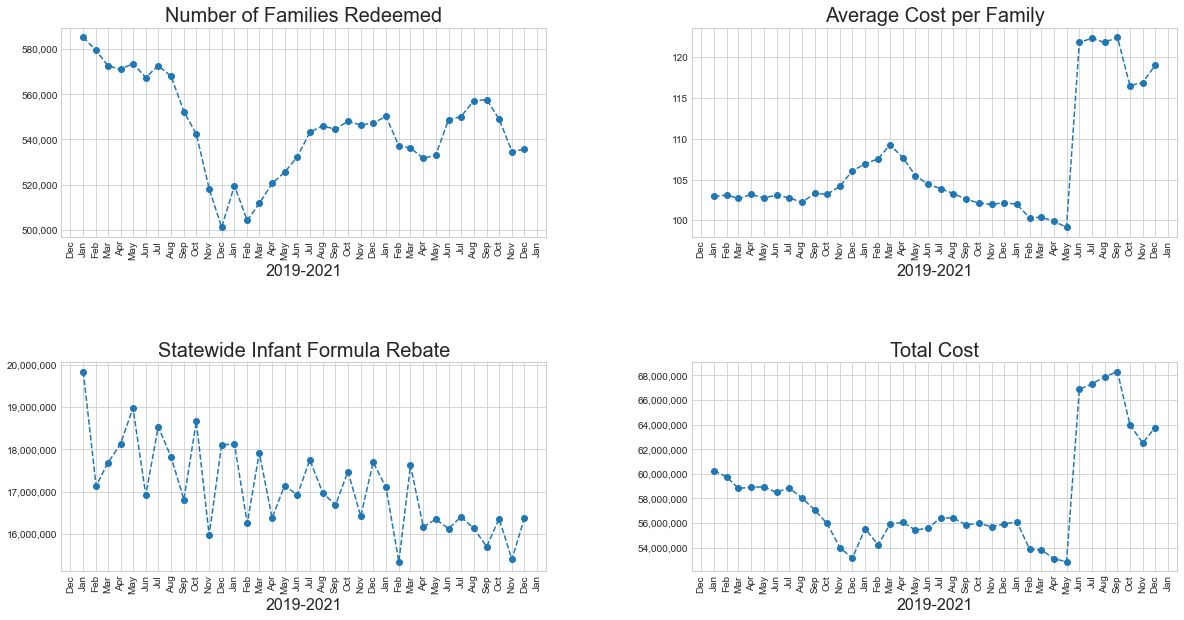

In [14]:
plt.figure(figsize=(20,10))
for i in range(1, 5):
    plt.subplot(2,2,i)
    plt.subplots_adjust(hspace=0.6,wspace=0.3)
    plt.title(state_covid.columns[i-1],fontsize=20)
    plt.xlabel("2019-2021",fontsize=16)
    plt.plot(state_covid.index.values,state_covid[state_covid.columns[i-1]], 'o--')

    # formatting the y-axis to reader-friendly numbers
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    
    # change xticks to months
    plt.xticks(rotation=90)
    ax = plt.gca()
    locator = mdates.MonthLocator()
    month_fmt = mdates.DateFormatter('%b')
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(month_fmt)


I am going to describe the plots above with the conclusion we get from the yearly data above:
- Number of Families Redeemed turned sharply from dropping to rising at the beginning of 2020, but started to fall at the end of 2021. But at the end of 2021, the number is still higher than the end of 2019, that is why we saw a little increase from 2020-2021 in yearly plot.
- Both Average Cost per Family and Total Cost suddenly increased by over 20% in May 2021. The high numbers stayed stable for four months, then decreased a bit. The increasing matches what we saw in yearly graphs.
- Statewide Infant Formula Rebate still seesawed even lower during this period of time. It seems that Covid has no impact to this rebate program, from my point of view.

#### 2. County-level Analysis 
Similar dataset at county-level provides us a chance to break up and integrate features which can not be shown at state-level. In this part I am going to evaluate the relationship between each features we are interested in.

2a. Number of Families VS Average Cost
- Let's have a look at the redemption data from all CA counties in year 2021. The table below shows us the top ten counties with most number of families using WIC. 
- Los Angeles has the most number of families redeemed, and a relatively high average cost. Is there any correlation between these two features? We will use scatter plots to find it.

In [15]:
county_2021 = county[county['Obligation Year and Month']==2021].sort_values(by='Number of Families Redeemed', ascending=False)
county_2021.head(10)
top10 = county_2021.iloc[0:10, 0].tolist()

Text(0, 0.5, 'Average Cost')

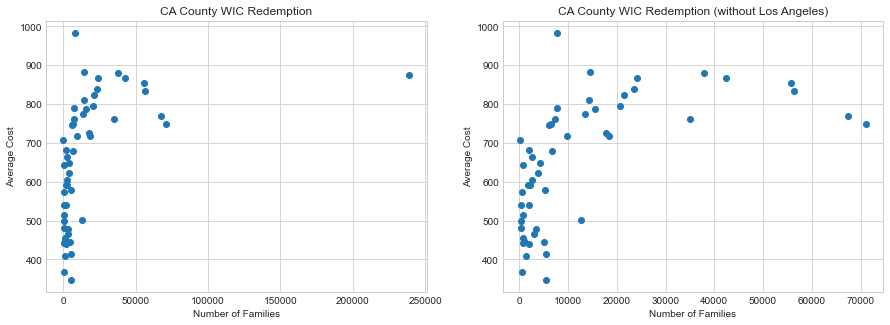

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.scatter(data=county_2021, x="Number of Families Redeemed", y="Average Cost per Family")
plt.title("CA County WIC Redemption")
plt.xlabel("Number of Families")
plt.ylabel("Average Cost")

plt.subplot(1, 2, 2)
plt.scatter(data=county_2021[county_2021['Number of Families Redeemed']<100000], x="Number of Families Redeemed", y="Average Cost per Family")
plt.title("CA County WIC Redemption (without Los Angeles)")
plt.xlabel("Number of Families")
plt.ylabel("Average Cost")


What we can learn from the two graphs above:
- Since Los Angeles has a massive number of participants, it appears as an outlier on the left scatter plot, which compresses the rest of the data points over to the left and makes it difficult to see the patterns. The plot on the right excludes LA is much eaiser to read.
- From the right plot we can tell most counties with participant families over 10000 has an average redemption cost between 700 to 900. For a county with less than 10000 WIC families, majority of the average cost seems to be less than 700.

Correlation coefficient interpretation:
- Although the correlation seems to be logrithm, we might still try to find the correlation using linear model we have learned in class. As a result, the correlation between number of families and average cost in entire state is 0.44, which indicates a low correlation.
- We can divide counties into two groups, a group with over 10000 participant families, and another group with less than 10000 families. The same correlation in each group is: 0.27 and 0.54. So in counties with less than 10000 WIC families, we have a moderate correlation between number of families and average cost, but is counties with bigger number of WIC families, we have a even lower correlation.

In [17]:
corr_2021 = county_2021["Number of Families Redeemed"].corr(county_2021["Average Cost per Family"])
print('The correlation between number of families redeemed and average cost per family in 2021: ',
    round(corr_2021,4))


The correlation between number of families redeemed and average cost per family in 2021:  0.4383


In [18]:
county_2021_big = county_2021[county_2021["Number of Families Redeemed"]>10000]
county_2021_small = county_2021[county_2021["Number of Families Redeemed"] <= 10000]
print("Number of counties with over 10000 WIC families: ",county_2021_big.shape[0])
print("Number of counties with less or equal than 10000 WIC families: ",county_2021_small.shape[0])

corr_2021_big = county_2021_big["Number of Families Redeemed"].corr(county_2021_big["Average Cost per Family"])
print('The correlation in big particitant counties in 2021 is : ',
    round(corr_2021_big,4))

corr_2021_small = county_2021_small["Number of Families Redeemed"].corr(county_2021_small["Average Cost per Family"])
print('The correlation in small particitant counties in 2021 is : ',
    round(corr_2021_small,4))

Number of counties with over 10000 WIC families:  19
Number of counties with less or equal than 10000 WIC families:  34
The correlation in big particitant counties in 2021 is :  0.2714
The correlation in small particitant counties in 2021 is :  0.5438


2b. Number of Families Redeemed VS Covid Time
- As we mentioned above, the number of WIC families keeps on decreasing until 2021. Is this a trend across all counties, or some big counties dropped so great that affect the whole number?
- Line plot works best for 2 corresponding data sequences changing over time.
- Several counties do not have full populated data in 12 years, so these counties are catched and passed during plotting.

In [19]:
county_1221 = county[county['Obligation Year and Month']<2022]
county_2019 = county[county['Obligation Year and Month']==2019]
county_list = county_1221['Vendor County'].unique().tolist()

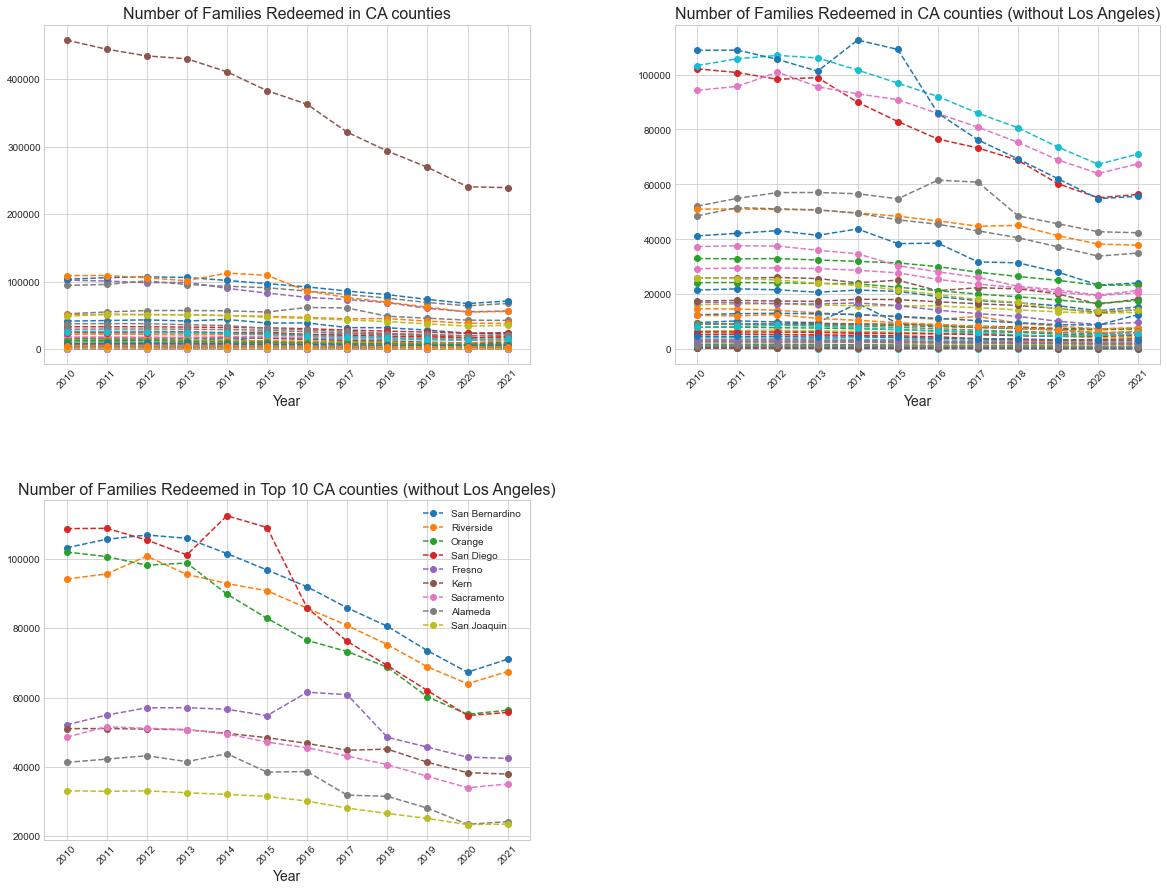

In [20]:
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.4,wspace=0.3)
plt.subplot(2, 2, 1)
plt.title('Number of Families Redeemed in CA counties',fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.xticks(np.arange(12),state_year.index.tolist(),rotation=45)
for county in county_list:
    if (county_1221[county_1221['Vendor County'] == county].shape[0] == 12):
        plt.plot(np.arange(12), county_1221[county_1221['Vendor County'] == county]['Number of Families Redeemed'], 'o--')

plt.subplot(2, 2, 2)
plt.title('Number of Families Redeemed in CA counties (without Los Angeles)',fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.xticks(np.arange(12),state_year.index.tolist(),rotation=45)
for county in county_list:
    if (county_1221[county_1221['Vendor County'] == county].shape[0] == 12):
        if county != 'Los Angeles':
            plt.plot(np.arange(12), county_1221[county_1221['Vendor County'] == county]['Number of Families Redeemed'], 'o--')
plt.subplot(2, 2, 3)
plt.title('Number of Families Redeemed in Top 10 CA counties (without Los Angeles)',fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.xticks(np.arange(12),state_year.index.tolist(),rotation=45)
for county in top10[1:]:
    if (county_1221[county_1221['Vendor County'] == county].shape[0] == 12):
        if county != 'Los Angeles':
            plt.plot(np.arange(12), county_1221[county_1221['Vendor County'] == county]['Number of Families Redeemed'], 'o--', label = county)
plt.legend()


What we can learn from the three graphs above?
- As shown in first graph, LA county can be considered as an outlier, so the second graph gives us a whole picture of how the number of participants changed in every county besides LA.
- Second graph shows us although the numbers are not decreasing in every year, but in general, each county is experiencing less and less participants from 2010 to 2020. This situation changed in 2021, when most counties got a flat slope (without number decreasing) or even a positive slope with number increasing.
- From the third graph we can tell, in top 2-10 counties with most participants, 8 out of 9 counties are having a increase in the number of WIC families in 2021, even for the county which dropped most repidly, San Diego.
- It is worth noticing that although the increases in numbers are not as big as drops in previous years, which  explains the statewide data, that the increase in 2021 is almost shown in a flat slope, it is still not usual for such a sudden raise in nearly all counties in CA.


2c. Average cost VS Time
- From the statewide data, we realize that the average cost raised dramatically in 2020 and 2021. Will the data across the counties shows the same pattern?
- I will also use spot line plots to illustrate the changes over time.
- Same as part 2b, we have several counties that do not have full populated data in 12 years, so these counties are catched and passed during plotting.


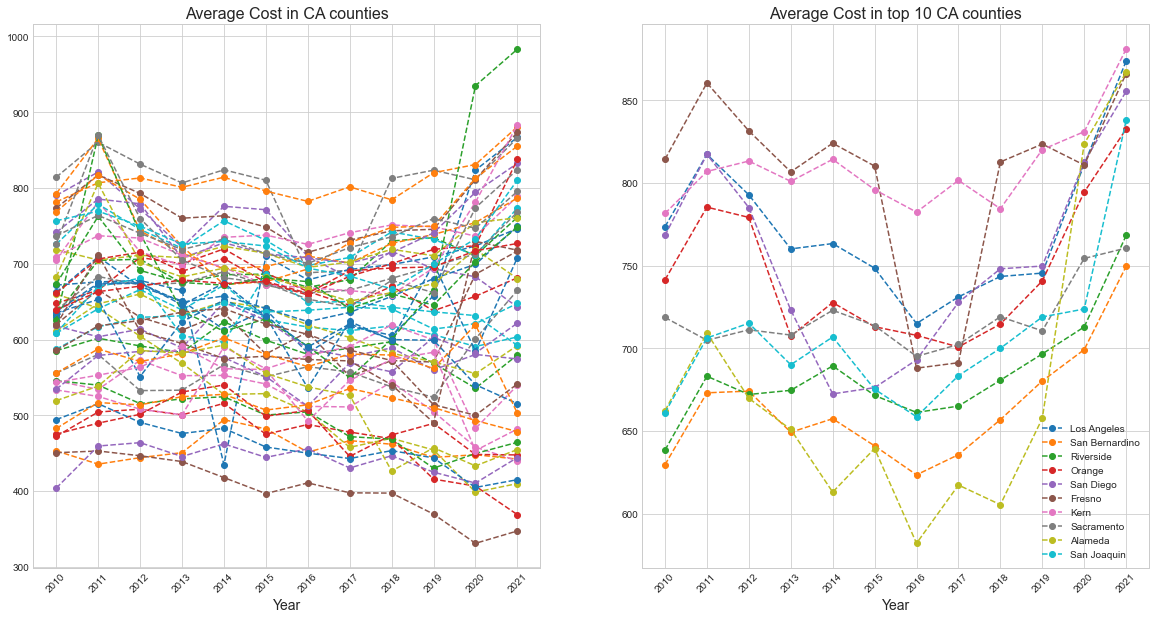

In [21]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.4,wspace=0.2)
plt.subplot(1, 2, 1)
plt.title('Average Cost in CA counties',fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.xticks(np.arange(12),state_year.index.tolist(),rotation=45)
for county in county_list:
    if (county_1221[county_1221['Vendor County'] == county].shape[0] == 12):
        plt.plot(np.arange(12), county_1221[county_1221['Vendor County'] == county]['Average Cost per Family'], 'o--')
plt.subplot(1, 2, 2)
plt.title('Average Cost in top 10 CA counties',fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.xticks(np.arange(12),state_year.index.tolist(),rotation=45)
for county in top10:
    if (county_1221[county_1221['Vendor County'] == county].shape[0] == 12):
        plt.plot(np.arange(12), county_1221[county_1221['Vendor County'] == county]['Average Cost per Family'], 'o--', label = county)

plt.legend()

What we can learn from the graphs above?
- The graph on the left shows the changes of average cost in all CA counties over time. We can tell from 2010 to 2019, the majority of lines lie in an interval of 400 to 800, but at the year of 2021, many of the counties have reached an average cost over 800.
- The graph on the right gives us the changes of average cost in top 10 counties with most WIC participants. These counties have relatively more influence on statewide figures than other counties. 9 out of 10 counties have rapid growth of average cost in both 2020 and 2021. This result corresponds to our findings regarding statewide growth in average cost.

3d. Redemption VS Location
- Did the outbreak of Covid_19 change the WIC redemption geographically? We can have a look by placing each county back into the map, using seaborn relplot.
- We are comparing data from 2019 and 2021, with additional location data file cleaned and merged into redemption data by name of counties.

In [22]:
#county_2019 = county[county['Obligation Year and Month']==2019]
ca_map = pd.read_csv('California_Counties.csv')
ca_map = ca_map.rename(columns={"Name":"Vendor County"})
ca_map = ca_map.drop(columns = ['the_geom'])
map_2021 = pd.merge(county_2021, ca_map, on = 'Vendor County')
map_2019 = pd.merge(county_2019, ca_map, on = 'Vendor County')
map_covid = map_2021.append(map_2019, ignore_index=True)

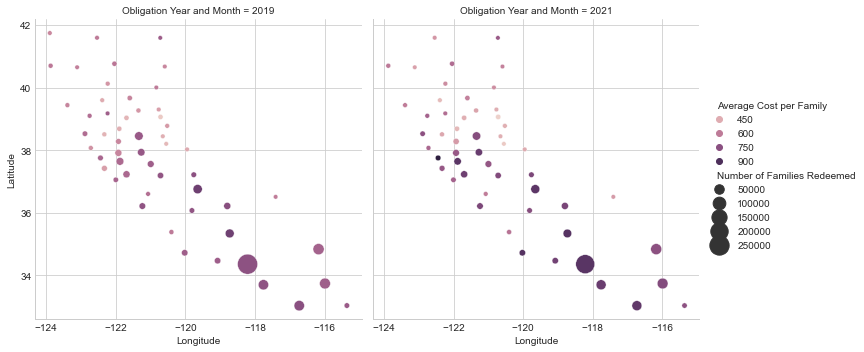

In [23]:
sns.relplot(data=map_covid,x='Longitude',y='Latitude', col='Obligation Year and Month',
            hue='Average Cost per Family',size='Number of Families Redeemed',sizes = (20, 400))


As the dot plots shown above, we can compare the redemption status between 2019 and 2020.
- Each dot represents the center of a county in CA.
- Hue of dots indicates average cost. Many of the dots from 2021 turn darker than 2019, especially the dots locates in the middle to southern parts of CA. This result corresponds to our findings, that the average cost is growing significantly at both county and state levels. Majority of the dots in northern CA stayed in light colors. I also find that if the county has high average cost in 2019, it is more like for the cost to grow after 2021. Low stays low, high get higher.
- Size of dots means number of participants, we can tell that between these two plots, there is not much difference in dot sizes. For previous research we also find that the number of WIC families dropped some in 2020, then only increased a little in 2021.

Since the dot sizes are larger in some areas than others, I was curious if the redemption need can be met, by plotting the distribution of WIC vendors across the state. As the plot shown below, the darker the area is, the more grocery vendors exists. This graph shares some similarity with our Redemption vs Location graphs above.

Text(0.5, 1.0, 'Layout of WIC vendors in CA')

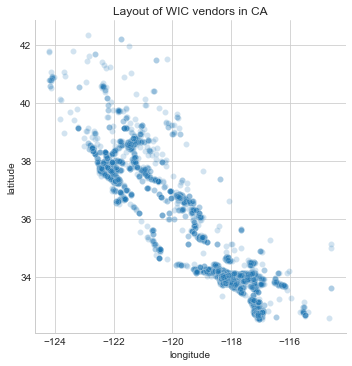

In [24]:
vendor = pd.read_csv('vendor.csv').iloc[:, -2:].dropna()
vendor.columns=['latitude','longitude']
sns.relplot(
    data=vendor[vendor['longitude']<0],
    x='longitude',
    y='latitude',
    alpha=0.2
)
plt.title('Layout of WIC vendors in CA')

### Part 5: Conclusion

#### What do we learn from this project?
- From the analysis above, we find that from 2010-2019, the WIC program is facing a rapid decrease in number of participants. This situation, together with a drop in average cost, leads to a lower number of total cost year by year.
- However, the outbreak of Covid-19 might be changing the whole picture of WIC program. From the data in both 2020 and 2021, we can find a slightly increase in number of participants, a siginificant raise in average cost, and a small grow in total cost. But the cost of Statewide Infant Formula Rebate is still dropping no matter of time.
- The WIC redemption data at county-level provides us a more detailed points of view. From the analysis above, we can find that there is a small to moderate correlation between number of participants and average cost. Counties with over 10000 WIC families tends to have higher average redemption cost. During Covid time, most of the counties showed the same growth pattern as the state, like a small grow in the number of families, a bigger grow in average cost.
- After the outbreak of Covid, the WIC redemption also changed geographically. The average cost differences between northern CA and southern CA became more visiable. The counties with larger number of participants and higher redemption costs are mainly located in southern CA, whose data shows greater changes after 2019.

#### What can we do to improve our project?
- This project has many scopes that can be improved in the future. We can dig deeper by incorporating more granualar data, like the statewide distribution of population, income and employment situation. These factors might help us generate a better understanding of the changes happened to WIC program.
- Because we are now at the end of the pandemic, more data still need to be collected percisely and frequently. To evaluate a problem like WIC, which is growing and developing coutinuously, we should keep up with the data in the years to come. 